# Exploratory Data Analysis

In [19]:
# import necessary libs
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
low_memory=False
pd.options.display.float_format = '{:.4f}'.format

In [4]:
df = pd.read_csv('/Volumes/Backup Plus/Documents/Data Science/Projects/fannieMae_project/processed_data/Fannie_loans.csv')

In [9]:
df.shape

(3194421, 26)

In [13]:
df=df.drop(['Unnamed: 0'], axis=1)

In [21]:
df.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrowers', 'DTIRat', 'CreditScore', 'NumUnits', 'MortInsPerc',
       'CoCreditScore', 'MortInsType', 'Default', 'Channel', 'SellerName',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'OccType',
       'PropertyState', 'ProductType', 'RelocationMortgage', 'Zip',
       'first_payment_year', 'loan_year'],
      dtype='object')

In [24]:
df.dtypes

OrInterestRate        float64
OrUnpaidPrinc           int64
OrLoanTerm              int64
OrLTV                 float64
OrCLTV                float64
NumBorrowers          float64
DTIRat                float64
CreditScore           float64
NumUnits                int64
MortInsPerc           float64
CoCreditScore         float64
MortInsType           float64
Default                 int64
Channel                object
SellerName             object
FTHomeBuyer            object
LoanPurpose            object
PropertyType           object
OccType                object
PropertyState          object
ProductType            object
RelocationMortgage     object
Zip                     int64
first_payment_year      int64
loan_year               int64
dtype: object

In [47]:
df["loan_year"]=df["loan_year"].astype("category")

### Take a look at defaults

In [96]:
df['Default'].value_counts()

0    3140482
1      53939
Name: Default, dtype: int64

In [97]:
df['Default'].mean()

0.016885376097890665

### When did most defaults happen?

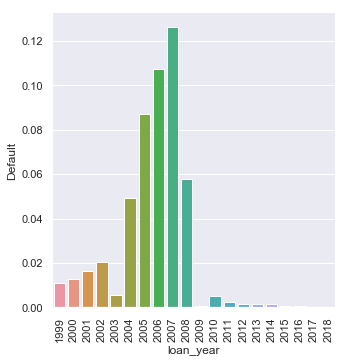

In [98]:
sns.catplot(y="Default",
            x="loan_year",
            data=df,
           kind="bar",
           ci=None)
# Display plot
plt.xticks(rotation=90)
plt.show()

### Where did most defaults happen?

In [95]:
default_states=df.groupby('PropertyState', as_index=False).agg({"Default": "mean", "OrInterestRate": "count"})
default_states.rename(columns={'OrInterestRate':'number of loans'}, inplace=True)
default_states.sort_values(by=['Default'], ascending=False).head(10)

,PropertyState,Default,number of loans
48,VI,0.0763,131
9,FL,0.0327,163636
34,NV,0.0327,39574
3,AZ,0.0322,100961
23,MI,0.0283,114225
10,GA,0.0247,88820
36,OH,0.0237,126324
16,IN,0.0215,89454
52,WV,0.0198,10641
40,PR,0.0197,7103


### Which banks have the highest default rates?

In [93]:
default_banks=df.groupby('SellerName', as_index=False).agg({"Default": "mean", "OrInterestRate": "count"})
default_banks.rename(columns={'OrInterestRate':'number of loans'}, inplace=True)
default_banks.sort_values(by=['Default'], ascending=False).head(10)

,SellerName,Default,number of loans
73,"PULTE MORTGAGE, L.L.C.",0.2025,316
25,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",0.2000,70
11,CHASE HOME FINANCE (CIE 1),0.1860,86
10,CHASE HOME FINANCE,0.1066,2739
13,"CHASE HOME FINANCE, LLC",0.0911,2601
69,"PNC BANK, N.A.",0.0735,18188
12,CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE ...,0.0617,535
60,OLD KENT MORTGAGE COMPANY,0.0541,37
32,FLAGSTAR CAPITAL MARKETS CORPORATION,0.0515,24722
5,"BANK OF AMERICA, N.A.",0.0499,352113


In [94]:
default_banks.sort_values(by=['number of loans'], ascending=False).head(10)

,SellerName,Default,number of loans
61,OTHER,0.0095,1342206
93,"WELLS FARGO BANK, N.A.",0.0072,385923
5,"BANK OF AMERICA, N.A.",0.0499,352113
31,"FLAGSTAR BANK, FSB",0.0257,88415
50,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0.0041,78540
74,QUICKEN LOANS INC.,0.0011,74520
16,"CITIMORTGAGE, INC.",0.0346,71784
38,"GMAC MORTGAGE, LLC",0.0327,69823
49,"JPMORGAN CHASE BANK, NA",0.0177,60127
83,SUNTRUST MORTGAGE INC.,0.0407,58917


### What were the characteristics of home buyers who defaulted? 

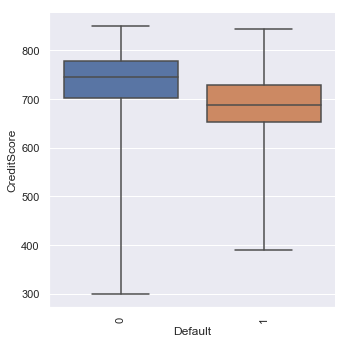

In [60]:
sns.catplot(y="CreditScore",
            x="Default",
            data=df,
           kind="box",
            whis=[0, 100],
           ci=None)
plt.xticks(rotation=90)
# Display plot
plt.show()

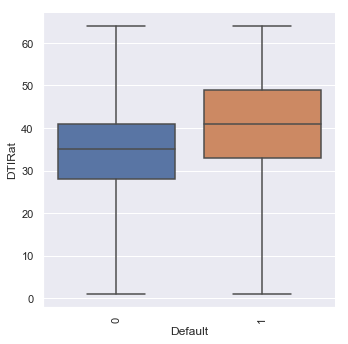

In [61]:
sns.catplot(y="DTIRat",
            x="Default",
            data=df,
           kind="box",
            whis=[0, 100],
           ci=None)
plt.xticks(rotation=90)
# Display plot
plt.show()

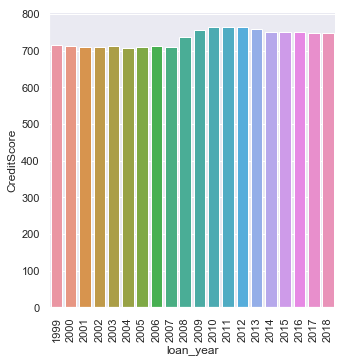

In [99]:
sns.catplot(y="CreditScore",
            x="loan_year",
            data=df,
           kind="bar",
           ci=None)
# Display plot
plt.xticks(rotation=90)
plt.show()

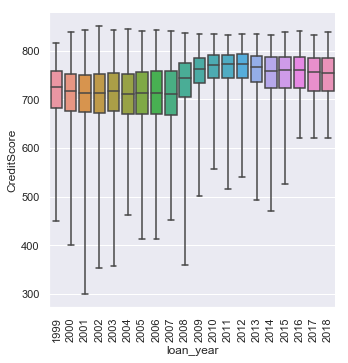

In [100]:
sns.catplot(y="CreditScore",
            x="loan_year",
            data=df,
           kind="box",
            whis=[0, 100],
           ci=None)
plt.xticks(rotation=90)
# Display plot
plt.show()